# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.RECOUNT2

In [3]:
# ENRICH_FUNCTION = "enrichGO"

In [4]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [5]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [6]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [7]:
# SIMILARITY_MATRICES_DIR = conf.GTEX["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [8]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = conf.GTEX["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [9]:
INPUT_FILE = DATASET_CONFIG["CLUSTERING_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/recount2/clustering/recount_data_prep_PLIER-clustering.pkl')

# Load data

In [10]:
df = pd.read_pickle(INPUT_FILE)

In [11]:
df.shape

(150, 6)

In [12]:
df["corr_method"].unique()

['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [13]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    tmp = df.head()
    display(tmp)

,id,n_clusters,partition,si_score,corr_method,clust_method
0,SpectralClustering #0,2,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, ...]",0.058329,clustermatch_k2,SpectralClustering
1,SpectralClustering #1,5,"[0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 2, 0, 2, 4, 0, 0, 1, 3, 0, 3, 2, 3, 0, 1, 0, 0, 4, 1, 3, 4, 0, 4, 4, 0, 4, 2, 4, 0, 0, 0, 4, 1, 4, 4, 0, 3, 4, 3, 0, 0, 0, 0, 0, 4, 4, 1, 1, 0, 4, 0, 0, 1, 0, 1, 4, 0, 1, 1, 4, 0, 0, 0, 1, 4, 0, 0, 4, 1, 1, 0, 0, ...]",0.054201,clustermatch_k2,SpectralClustering
2,SpectralClustering #2,10,"[3, 3, 3, 7, 3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 5, 0, 3, 3, 3, 5, 3, 7, 3, 3, 7, 3, 3, 9, 3, 9, 7, 3, 5, 1, 6, 3, 6, 5, 0, 3, 1, 3, 3, 7, 1, 6, 9, 3, 7, 7, 3, 5, 0, 7, 3, 1, 5, 7, 3, 7, 1, 3, 6, 5, 6, 3, 3, 3, 3, 3, 7, 5, 1, 1, 5, 1, 3, 3, 1, 3, 1, 9, 3, 5, 5, 7, 3, 5, 3, 1, 5, 1, 3, 7, 5, 1, 3, 3, ...]",0.038756,clustermatch_k2,SpectralClustering
3,SpectralClustering #3,15,"[4, 4, 4, 10, 13, 12, 4, 4, 10, 4, 13, 12, 4, 4, 4, 4, 12, 0, 4, 4, 4, 12, 4, 12, 4, 13, 10, 12, 4, 8, 12, 0, 0, 4, 3, 12, 10, 4, 11, 12, 0, 13, 12, 4, 13, 10, 1, 11, 0, 4, 10, 12, 13, 12, 14, 0, 4, 12, 4, 12, 13, 10, 0, 4, 11, 12, 11, 13, 4, 13, 4, 13, 10, 0, 1, 12, 12, 12, 4, 0, 1, 4, 1, 0, 10, 12, 13, 12, 4, 12, 13, 1, 12, 3, 13, 12, 12, 1, 4, 4, ...]",0.031417,clustermatch_k2,SpectralClustering
4,SpectralClustering #4,20,"[13, 13, 11, 5, 19, 4, 11, 11, 4, 11, 19, 13, 11, 11, 13, 11, 10, 17, 13, 11, 13, 13, 11, 13, 11, 19, 5, 13, 11, 0, 10, 1, 13, 11, 9, 13, 5, 11, 18, 10, 1, 19, 9, 11, 19, 10, 16, 18, 10, 11, 4, 17, 19, 9, 10, 1, 11, 13, 9, 4, 13, 10, 17, 11, 18, 5, 18, 19, 1, 19, 11, 19, 4, 9, 16, 13, 9, 13, 11, 13, 16, 11, 16, 13, 4, 13, 9, 4, 11, 9, 13, 16, 9, 13, 13, 13, 9, 16, 11, 11, ...]",0.027535,clustermatch_k2,SpectralClustering


# SI score by method

In [14]:
# plot_data = df.groupby(["n_clusters", "corr_method", "gene_sel_strategy", "clust_method"])["si_score"].mean().reset_index()

In [15]:
# plot_data.shape

In [16]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

In [17]:
selected_corr_methods = [
    "clustermatch_k2to5",
    "clustermatch_k2",
    "spearman_abs",
    "pearson_abs",
]

plot_data = df[
    (np.ones(df.shape[0]).astype(bool)) & (df.corr_method.isin(selected_corr_methods))
]

In [18]:
plot_data.shape

(100, 6)

In [19]:
plot_data.corr_method.unique()

['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'spearman_abs']
Categories (6, object): ['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [20]:
PERFORMANCE_MEASURE = "si_score"
# PERFORMANCE_MEASURE = "rich_factor"
# PERFORMANCE_MEASURE = "fold_enrich"

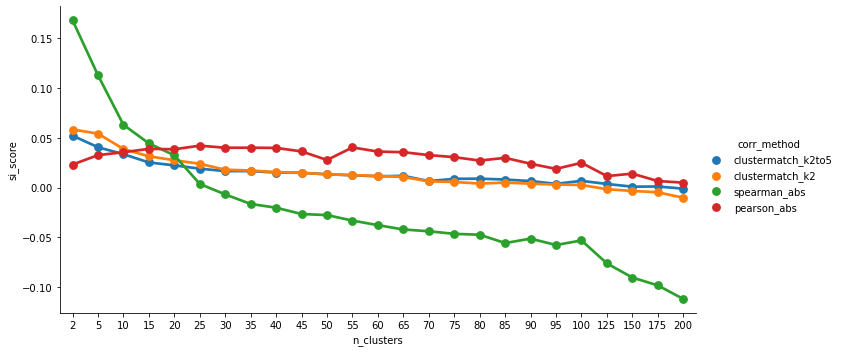

In [21]:
# fig, ax = plt.subplots(figsize=(10, 8))

sns.catplot(
    data=plot_data,
    x="n_clusters",
    y="si_score",
    hue="corr_method",
    hue_order=selected_corr_methods,
    kind="point",
    height=5,
    aspect=2,
    #     ax=ax,
)

# ax.set_xlabel(None)
# # ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

# Size of clusters

In [22]:
# plot_data = df.groupby(["n_clusters", "corr_method", "gene_sel_strategy", "clust_method"])["si_score"].mean().reset_index()

In [23]:
# plot_data.shape

In [24]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

In [25]:
plot_data = df[
    (np.ones(df.shape[0]).astype(bool)) & (df.corr_method.isin(selected_corr_methods))
]

In [26]:
plot_data.shape

(100, 6)

In [27]:
plot_data.head()

,id,n_clusters,partition,si_score,corr_method,clust_method
0,SpectralClustering #0,2,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",0.058329,clustermatch_k2,SpectralClustering
1,SpectralClustering #1,5,"[0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 0, 0, 0, 0, ...",0.054201,clustermatch_k2,SpectralClustering
2,SpectralClustering #2,10,"[3, 3, 3, 7, 3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, ...",0.038756,clustermatch_k2,SpectralClustering
3,SpectralClustering #3,15,"[4, 4, 4, 10, 13, 12, 4, 4, 10, 4, 13, 12, 4, ...",0.031417,clustermatch_k2,SpectralClustering
4,SpectralClustering #4,20,"[13, 13, 11, 5, 19, 4, 11, 11, 4, 11, 19, 13, ...",0.027535,clustermatch_k2,SpectralClustering


In [28]:
pd.Series(plot_data.iloc[0]["partition"]).value_counts().to_dict()

{0: 3558, 1: 3192}

In [29]:
from scipy.stats import entropy

In [30]:
def _get_partition_stats(part):
    return pd.Series(part).value_counts().to_numpy()


def _get_max_entropy(part_stats):
    n_clusters = len(part_stats)
    return entropy([1 / n_clusters for i in range(n_clusters)])


def _compute_score(part_stats):
    return entropy(part_stats) / _get_max_entropy(part_stats)


plot_data = plot_data.assign(
    partition_stats=plot_data["partition"].apply(_get_partition_stats)
)
plot_data = plot_data.assign(
    cluster_score=plot_data["partition_stats"].apply(_compute_score)
)

In [31]:
entropy([4364, 636])

0.3810291481388292

In [32]:
entropy([4960, 40])

0.046594424222104566

In [33]:
entropy([1 / 2, 1 / 2])

0.6931471805599453

In [34]:
entropy([2500, 2500])

0.6931471805599453

In [35]:
entropy([4364, 636])

0.3810291481388292

In [36]:
_get_max_entropy([4364, 636])

0.6931471805599453

In [37]:
_compute_score([4364, 636])

0.5497088624540352

In [38]:
plot_data["cluster_score"].describe()

count    100.000000
mean       0.862558
std        0.097838
min        0.581886
25%        0.839512
50%        0.896351
75%        0.920734
max        0.999698
Name: cluster_score, dtype: float64

In [39]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

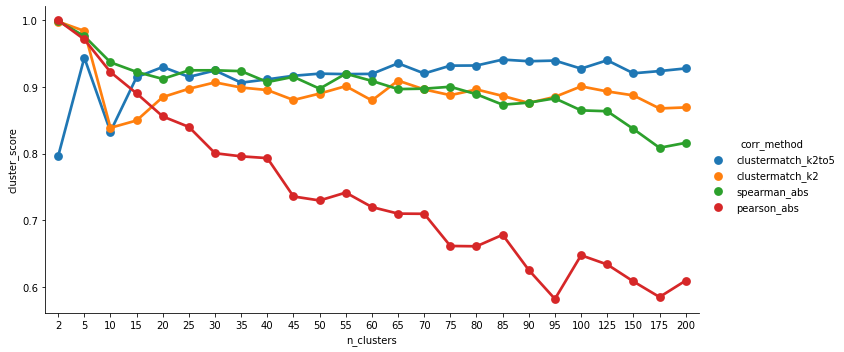

In [40]:
# fig, ax = plt.subplots(figsize=(10, 8))

sns.catplot(
    data=plot_data,
    x="n_clusters",
    y="cluster_score",
    hue="corr_method",
    hue_order=selected_corr_methods,
    kind="point",
    height=5,
    aspect=2,
    #     ax=ax,
)

# ax.set_xlabel(None)
# # ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

# Compare different corr methods

In [41]:
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score as ari

In [42]:
df[(df["corr_method"] == "clustermatch_k2") & (df["n_clusters"] == 2)].iloc[0][
    "partition"
]

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [43]:
df.head()

,id,n_clusters,partition,si_score,corr_method,clust_method
0,SpectralClustering #0,2,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",0.058329,clustermatch_k2,SpectralClustering
1,SpectralClustering #1,5,"[0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 0, 0, 0, 0, ...",0.054201,clustermatch_k2,SpectralClustering
2,SpectralClustering #2,10,"[3, 3, 3, 7, 3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, ...",0.038756,clustermatch_k2,SpectralClustering
3,SpectralClustering #3,15,"[4, 4, 4, 10, 13, 12, 4, 4, 10, 4, 13, 12, 4, ...",0.031417,clustermatch_k2,SpectralClustering
4,SpectralClustering #4,20,"[13, 13, 11, 5, 19, 4, 11, 11, 4, 11, 19, 13, ...",0.027535,clustermatch_k2,SpectralClustering


In [44]:
x = df[(df["corr_method"] == "clustermatch_k2") & (df["n_clusters"] == 2)].iloc[0][
    "partition"
]

y = df[(df["corr_method"] == "pearson_abs") & (df["n_clusters"] == 2)].iloc[0][
    "partition"
]

ari(x, y)

0.35635738418472257

In [45]:
all_methods = df["corr_method"].unique()
display(all_methods)

['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [46]:
all_k_values = df["n_clusters"].unique()
display(all_methods)

['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch_k2', 'clustermatch_k2to5', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [47]:
data = df.set_index(["corr_method", "n_clusters"]).sort_index()

In [50]:
data.loc[("clustermatch_k2", 2), "partition"]

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [51]:
def _get_part(method_name, k):
    tmp = data.loc[(method_name, k), "partition"]
    #     assert tmp.shape[0] == 1
    return tmp  # .iloc[0]["partition"]

In [55]:
sim_mat = defaultdict(list)

for k in all_k_values:
    for i in range(len(all_methods) - 1):
        mi = all_methods[i]
        mi_part = _get_part(mi, k)

        for j in range(i + 1, len(all_methods)):
            mj = all_methods[j]
            mj_part = _get_part(mj, k)

            sim_mat[k].append(ari(mi_part, mj_part))

In [56]:
from scipy.spatial.distance import squareform

In [76]:
sim_mat[3]

[]

In [89]:
k = 2

smat = squareform(sim_mat[k])
np.fill_diagonal(smat, 1.0)
smat = pd.DataFrame(smat, index=all_methods, columns=all_methods)

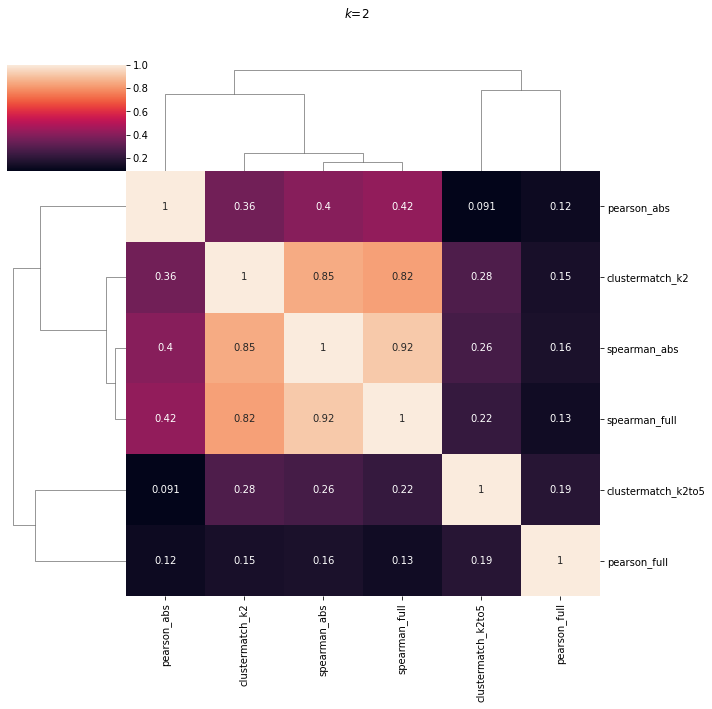

In [90]:
g = sns.clustermap(smat, annot=True)
g.fig.suptitle(f"$k$={k}")
g.fig.subplots_adjust(top=0.9)